In [1]:
# Import libraries
import numpy as np
import pandas as pd

# Reading ratings file
ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [2]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
n_users = ratings.user_id.unique().shape[0]
n_movies = ratings.movie_id.unique().shape[0]


In [5]:
Ratings = ratings.pivot(index = 'user_id', columns ='movie_id', values = 'rating').fillna(0)
Ratings.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
R = Ratings.to_numpy()  # 或者使用 R = Ratings.values
user_ratings_mean = np.mean(R, axis=1)
Ratings_demeaned = R - user_ratings_mean.reshape(-1, 1)


In [7]:
sparsity = round(1.0 - len(ratings) / float(n_users * n_movies), 3)

In [8]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Ratings_demeaned, k = 50)

In [9]:
sigma = np.diag(sigma)
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds = pd.DataFrame(all_user_predicted_ratings, columns = Ratings.columns)
preds.head()

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244


d:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.



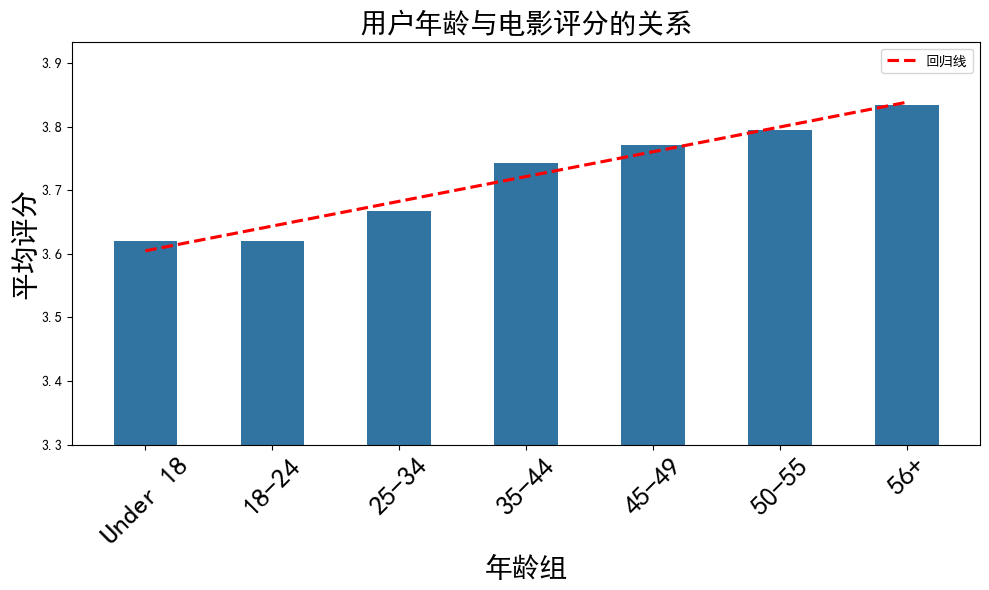

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

# 设置字体为 SimHei（黑体）或 Microsoft YaHei（微软雅黑）
rcParams['font.sans-serif'] = ['SimHei']  # 或者 ['Microsoft YaHei']
rcParams['axes.unicode_minus'] = False  # 用于正常显示负号

# 计算每个用户的平均评分
user_avg_ratings = ratings.groupby('user_id')['rating'].mean().reset_index()

# 将用户平均评分和年龄信息合并
user_avg_ratings = user_avg_ratings.merge(users, how='left', left_on='user_id', right_on='user_id')

# 计算每个年龄组的平均评分
age_group_avg_rating = user_avg_ratings.groupby('age_desc')['rating'].mean().reset_index()

# 对年龄组进行排序，确保'under18'在最前面
age_group_avg_rating = age_group_avg_rating.sort_values(by='age_desc', key=lambda x: x != 'Under 18')

# 绘制柱状图和回归线
plt.figure(figsize=(10, 6))
sns.barplot(data=age_group_avg_rating, x='age_desc', y='rating', color='#1f77b4', ci=None, width=0.5)

# 添加虚线回归线
sns.regplot(
    data=age_group_avg_rating,
    x=np.arange(len(age_group_avg_rating)),
    y='rating',
    scatter=False,
    color='red',
    line_kws={'linestyle': '--'},  # 设置虚线
    ci=None  # 不显示阴影
)

# 设置标题和标签
plt.title('用户年龄与电影评分的关系', fontsize=20)
plt.xlabel('年龄组', fontsize=20)
plt.ylabel('平均评分', fontsize=20)

# 设置刻度和纵轴范围
plt.xticks(ticks=np.arange(len(age_group_avg_rating)), labels=age_group_avg_rating['age_desc'], rotation=45, fontsize=20)  # 增加字体大小
plt.ylim(3.3, age_group_avg_rating['rating'].max() + 0.1)  # 从3.3开始

plt.legend(labels=['回归线'])
plt.tight_layout()
plt.savefig('user_ratings.png')
plt.show()


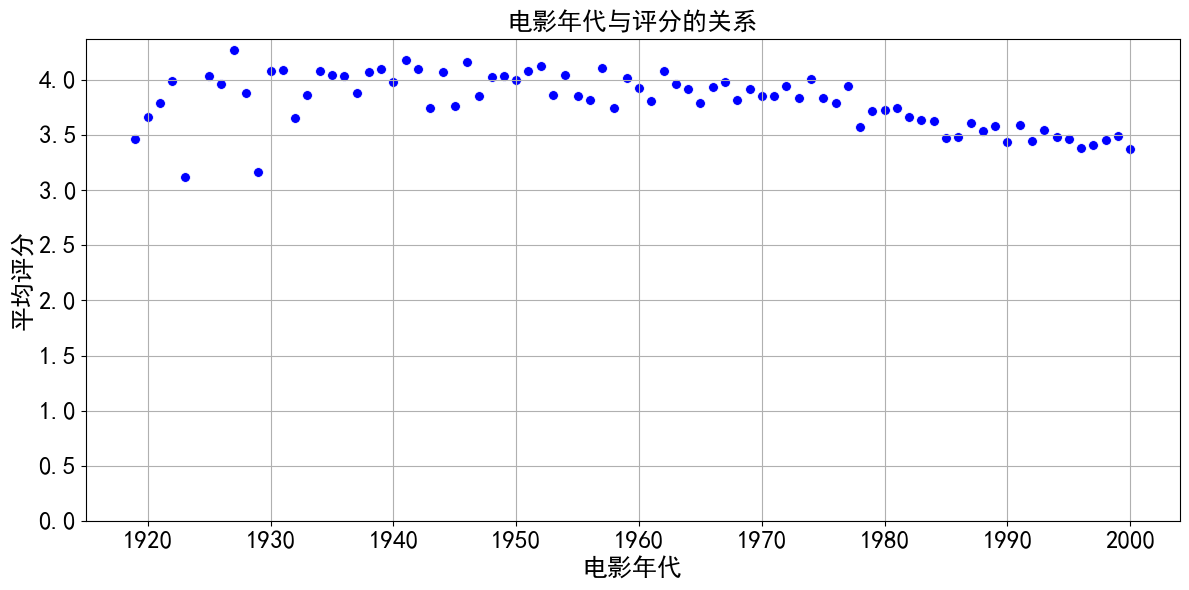

In [29]:
# 从标题中提取年份
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)

# 合并评分和电影数据以包含年份信息
ratings_with_year = ratings.merge(movies, how='left', left_on='movie_id', right_on='movie_id')

# 按年份分组并计算平均评分
yearly_avg_ratings = ratings_with_year.groupby('year')['rating'].mean().reset_index()

# 绘制散点图
plt.figure(figsize=(12, 6))
sns.scatterplot(data=yearly_avg_ratings, x='year', y='rating', color='blue', s=50)
plt.title('电影年代与评分的关系', fontsize=18)
plt.xlabel('电影年代', fontsize=18)
plt.ylabel('平均评分', fontsize=18)
plt.grid(True)

# 设置纵轴从0开始
plt.ylim(0, yearly_avg_ratings['rating'].max() + 0.1)  # 从0开始
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.savefig('decent_ratings.png')
plt.show()


In [16]:
def recommend_movies(predictions, userID, movies, original_ratings, num_recommendations):
    
    # Get and sort the user's predictions
    user_row_number = userID - 1 # User ID starts at 1, not 0
    sorted_user_predictions = preds.iloc[user_row_number].sort_values(ascending=False) # User ID starts at 1
    
    # Get the user's data and merge in the movie information.
    user_data = original_ratings[original_ratings.user_id == (userID)]
    user_full = (user_data.merge(movies, how = 'left', left_on = 'movie_id', right_on = 'movie_id').
                     sort_values(['rating'], ascending=False)
                 )


    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    recommendations = (movies[~movies['movie_id'].isin(user_full['movie_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'movie_id',
               right_on = 'movie_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [17]:
already_rated, predictions = recommend_movies(preds, 1310, movies, ratings, 20)

In [18]:
# Top 20 movies that User 1310 has rated 
already_rated.head(20)

,user_id,movie_id,rating,timestamp,title,genres
5,1310,2248,5,974781573,Say Anything... (1989),Comedy|Drama|Romance
6,1310,2620,5,974781573,This Is My Father (1998),Drama|Romance
7,1310,3683,5,974781935,Blood Simple (1984),Drama|Film-Noir
15,1310,1704,5,974781573,Good Will Hunting (1997),Drama
1,1310,1293,5,974781839,Gandhi (1982),Drama
12,1310,3101,4,974781573,Fatal Attraction (1987),Thriller
11,1310,1343,4,974781534,Cape Fear (1991),Thriller
20,1310,2000,4,974781892,Lethal Weapon (1987),Action|Comedy|Crime|Drama
18,1310,3526,4,974781892,Parenthood (1989),Comedy|Drama
17,1310,3360,4,974781935,Hoosiers (1986),Drama


In [21]:
# Top 20 movies that User 1310 hopefully will enjoy
predictions

,movie_id,title,genres
1618,1674,Witness (1985),Drama|Romance|Thriller
1880,1961,Rain Man (1988),Drama
1187,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War
1216,1242,Glory (1989),Action|Drama|War
1202,1225,Amadeus (1984),Drama
1273,1302,Field of Dreams (1989),Drama
1220,1246,Dead Poets Society (1989),Drama
1881,1962,Driving Miss Daisy (1989),Drama
1877,1957,Chariots of Fire (1981),Drama
1938,2020,Dangerous Liaisons (1988),Drama|Romance


In [27]:
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

# Load Reader library
reader = Reader()

# Load ratings dataset with Dataset library
data = Dataset.load_from_df(ratings[['user_id', 'movie_id', 'rating']], reader)

svd = SVD()

# Split the dataset for 5-fold evaluation
results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8751  0.8711  0.8735  0.8730  0.8746  0.8735  0.0014  
MAE (testset)     0.6867  0.6844  0.6861  0.6857  0.6862  0.6858  0.0008  
Fit time          34.76   37.01   38.86   29.51   43.38   36.70   4.58    
Test time         3.38    1.45    1.66    1.56    2.71    2.15    0.76    


In [ ]:
# 构建数据集
trainset = data.build_full_trainset()
# 初始化SVD模型
svd = SVD()
# 使用 fit 方法训练模型
svd.fit(trainset)

NameError: name 'data' is not defined

In [25]:
ratings[ratings['user_id'] == 1310]

,user_id,movie_id,rating,timestamp
215928,1310,2988,3,974781935
215929,1310,1293,5,974781839
215930,1310,1295,2,974782001
215931,1310,1299,4,974781701
215932,1310,2243,4,974782001
215933,1310,2248,5,974781573
215934,1310,2620,5,974781573
215935,1310,3683,5,974781935
215936,1310,3685,4,974781935
215937,1310,1185,4,974781839


In [26]:
svd.predict(1310, 1994)

Prediction(uid=1310, iid=1994, r_ui=None, est=3.348657218865324, details={u'was_impossible': False})